In [131]:
# importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [132]:
# Loading data
data = pd.read_excel(r"D:\Personal files\Data science Materials\ICT Academy_Materials\Data sets\iris_assig.xls")

In [133]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [134]:
data.shape

(150, 5)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [136]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [137]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


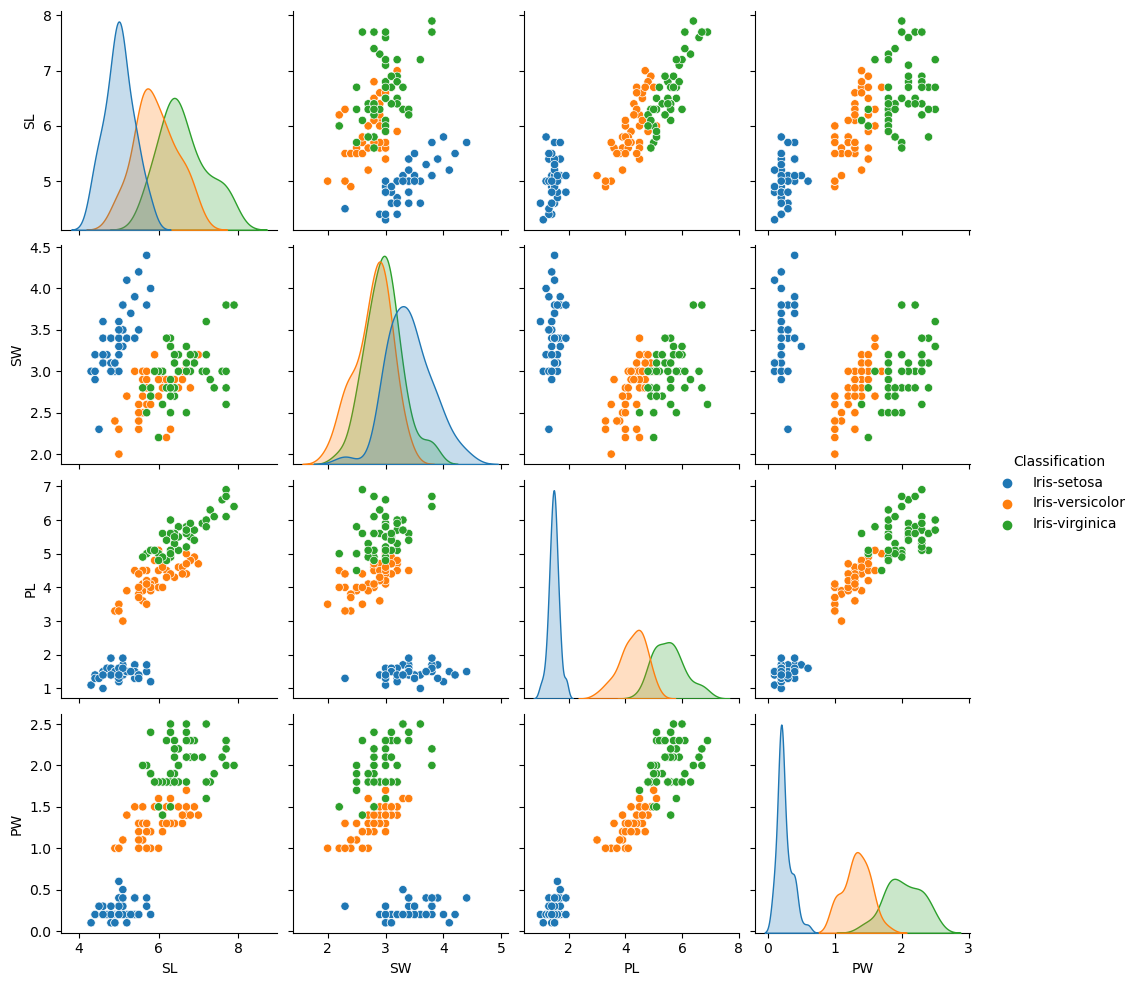

In [138]:
sns.pairplot(data,hue="Classification")
plt.show()

In [139]:
## filling missing values

In [140]:
data.SL.fillna(data.SL.median(),inplace=True)

In [141]:
data.PL.fillna(data.PL.median(),inplace=True)

In [142]:
data.SW.fillna(data.SW.median(),inplace=True)

In [143]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [144]:
data.nunique()

SL                35
SW                23
PL                44
PW                22
Classification     3
dtype: int64

In [145]:
## statistical values after filling the missing values
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


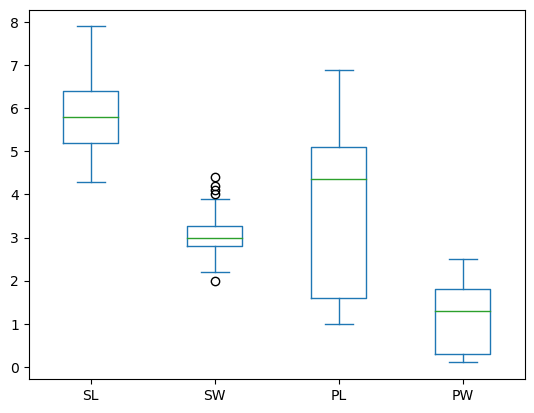

In [146]:
## Checking for Outliers
data.plot(kind="box")
plt.show()

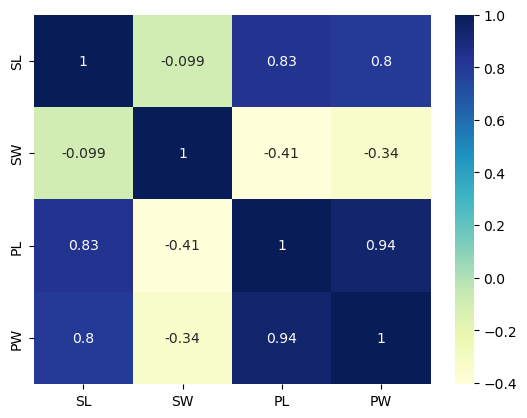

In [147]:
corr_mat =data.corr()
sns.heatmap(corr_mat,annot= True,cmap='YlGnBu')
plt.show()

In [148]:
data.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [149]:
x=data.drop('Classification',axis=1)
y=data.Classification

In [150]:
#spliting test and train set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=163)
model_lr = log_reg.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score

In [152]:
print(confusion_matrix(y_test, y_pred_lr),"confusion_matrix")
print("accuracy_score",accuracy_score(y_test, y_pred_lr))

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]] confusion_matrix
accuracy_score 0.9736842105263158


In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr ))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



## K nearest Neighbor(kNN)

In [154]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\karth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\karth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

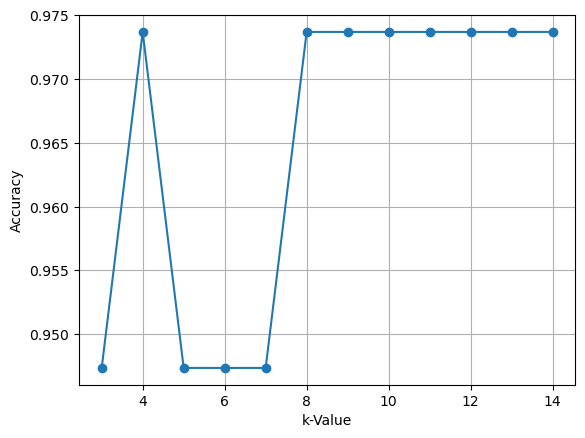

In [155]:
k_matrix = []
neighbors = np.arange(3, 15)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    model_knn = knn.fit(x_train, y_train)
    y_pred_knn = model_knn.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    k_matrix.append(acc)

plt.plot(neighbors, k_matrix,'o-')
plt.xlabel('k-Value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [156]:
knn = KNeighborsClassifier(n_neighbors=11,metric='canberra')
knn_model = knn.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

print(confusion_matrix(y_test, y_pred_knn)," - confusion_matrix")
print("accuracy_score - ",accuracy_score(y_test, y_pred_knn))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]  - confusion_matrix
accuracy_score -  1.0


C:\Users\karth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [157]:
knn = KNeighborsClassifier(n_neighbors=11,metric='euclidean')
knn_model = knn.fit(x_train, y_train)
y_pred_knn_e = knn_model.predict(x_test)

print(confusion_matrix(y_test, y_pred_knn)," - confusion_matrix")
print("accuracy_score - ",accuracy_score(y_test, y_pred_knn_e))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]  - confusion_matrix
accuracy_score -  0.9736842105263158


C:\Users\karth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [158]:
print(classification_report(y_test,y_pred_knn ))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



## SVM

#### SVM Linear Kernal

In [159]:
from sklearn.svm import SVC

In [160]:
svm_clf = SVC(kernel='linear')
svm_modell = svm_clf.fit(x_train, y_train)
y_pred_svml = svm_modell.predict(x_test)


print(confusion_matrix(y_test, y_pred_svml)," - confusion_matrix")
print("accuracy_score - ",accuracy_score(y_test, y_pred_svml))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]  - confusion_matrix
accuracy_score -  1.0


#### SVM rbf Kernal

In [161]:
svm_clf_rbf = SVC(kernel='rbf')
svm_modelr = svm_clf_rbf.fit(x_train, y_train)
y_pred_rbf = svm_modelr.predict(x_test)


print(confusion_matrix(y_test, y_pred_rbf)," - confusion_matrix")
print("accuracy_score - ",accuracy_score(y_test, y_pred_rbf))

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]  - confusion_matrix
accuracy_score -  0.9736842105263158


#### SVM Polynomial Kernal

In [162]:
svm_clf_poly = SVC(kernel='poly')
svm_modelp = svm_clf_poly.fit(x_train, y_train)
y_pred_poly = svm_modelp.predict(x_test)


print(confusion_matrix(y_test, y_pred_poly)," - confusion_matrix")
print("accuracy_score - ",accuracy_score(y_test, y_pred_poly))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]  - confusion_matrix
accuracy_score -  0.9736842105263158


## DECISION TREE MODEL.

In [163]:
from sklearn.tree import DecisionTreeClassifier
dtm_clf = DecisionTreeClassifier(random_state = 42)
dtm_clf.fit(x_train, y_train)
y_pred_dtm = dtm_clf.predict(x_test)


print(confusion_matrix(y_test, y_pred_dtm)," - confusion_matrix")
print("accuracy_score - ",accuracy_score(y_test, y_pred_dtm))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]  - confusion_matrix
accuracy_score -  1.0


In [164]:
fn=["Sepal Length",'Petal Length','Sepal Width','Petal Width']
cn=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [165]:
from sklearn import tree

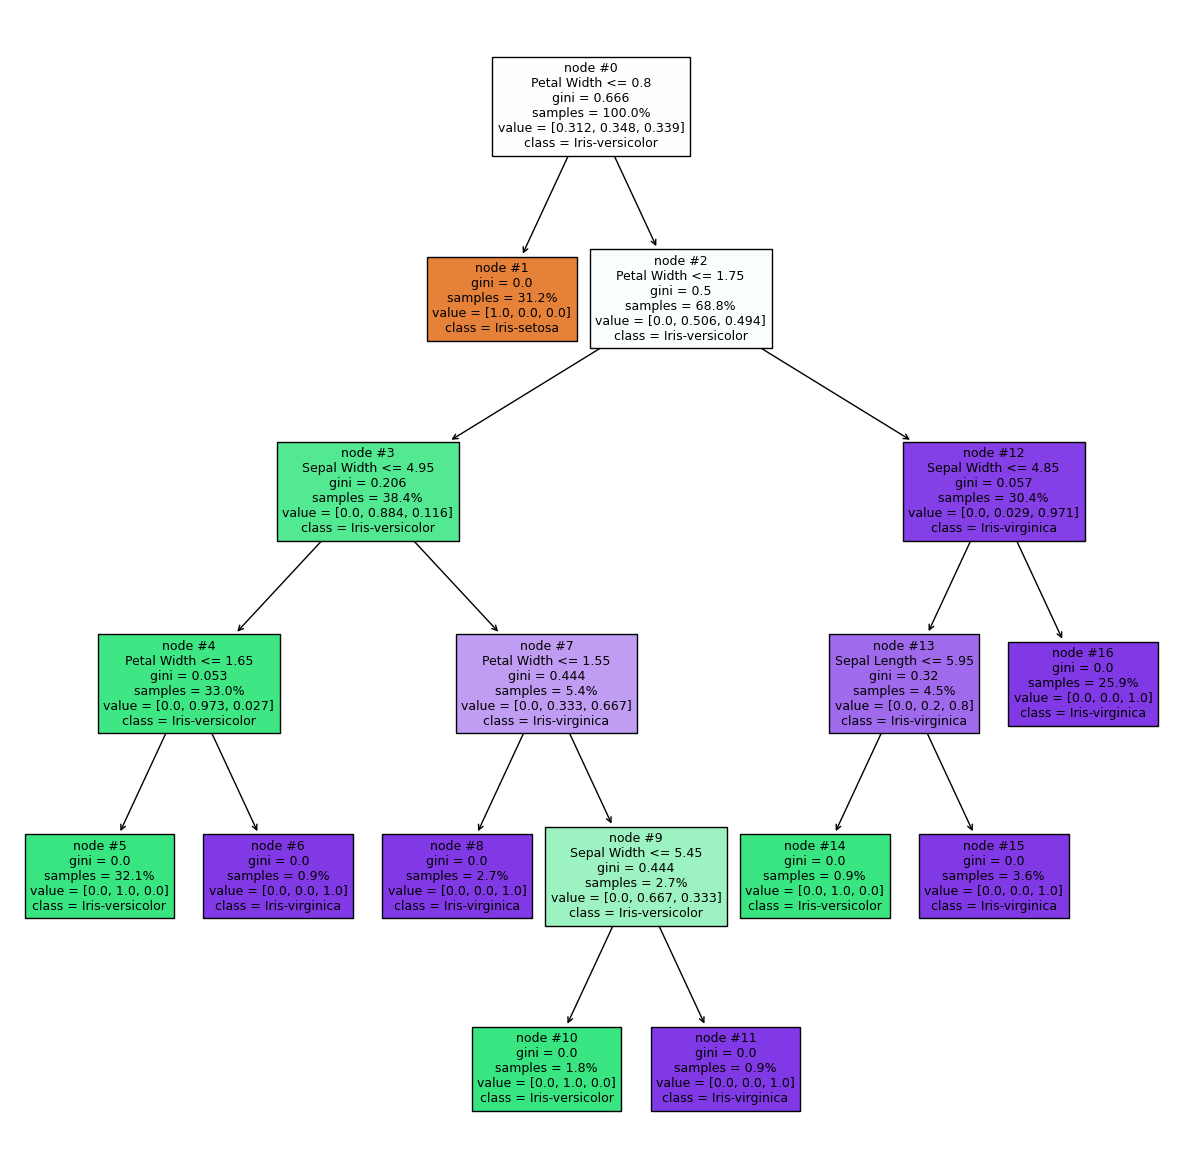

In [166]:
plt.figure(figsize=(15,15))
tree.plot_tree(dtm_clf,feature_names=fn,class_names=cn,filled=True,node_ids=True,proportion=True,fontsize=9)
plt.show()

## RANDOM FOREST MODEL.

In [167]:
from sklearn.ensemble import RandomForestClassifier
rfm_clf = RandomForestClassifier(random_state = 42)
rfm_clf.fit(x_train, y_train)
y_pred_rfm = rfm_clf.predict(x_test)


print(confusion_matrix(y_test, y_pred_rfm)," - confusion_matrix")
print("accuracy_score - ",accuracy_score(y_test, y_pred_rfm))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]  - confusion_matrix
accuracy_score -  1.0


In [168]:
print("Accuracy_score for Logistic Regression model :- ",accuracy_score(y_test, y_pred_lr))
print("")
print("Accuracy_score for kNN model with k=11 and metric=\"canberra\" :- ",accuracy_score(y_test, y_pred_knn))
print("")
print("Accuracy_score for kNN model with k=11 and metric=\"euclidean\" :- ",accuracy_score(y_test, y_pred_knn_e))
print("")
print("Accuracy_score for SVM model with kernal=\"linear\" :- ",accuracy_score(y_test, y_pred_svml))
print("")
print("Accuracy_score for SVM model with kernal=\"rbf\" :- ",accuracy_score(y_test, y_pred_rbf))
print("")
print("Accuracy_score for SVM model with kernal=\"poly\" :- ",accuracy_score(y_test, y_pred_poly))
print("")
print("Accuracy_score for decision tree model :- ",accuracy_score(y_test, y_pred_dtm))
print("")
print("Accuracy_score for random forest model :- ",accuracy_score(y_test, y_pred_rfm))

Accuracy_score for Logistic Regression model :-  0.9736842105263158

Accuracy_score for kNN model with k=11 and metric="canberra" :-  1.0

Accuracy_score for kNN model with k=11 and metric="euclidean" :-  0.9736842105263158

Accuracy_score for SVM model with kernal="linear" :-  1.0

Accuracy_score for SVM model with kernal="rbf" :-  0.9736842105263158

Accuracy_score for SVM model with kernal="poly" :-  0.9736842105263158

Accuracy_score for decision tree model :-  1.0

Accuracy_score for random forest model :-  1.0


## INFERENCE
    - Out of all the Machine Learning models mentioned above apart from Logestic Regression, kNN(matrix="euclidean")
      and SVM(kernel='poly'and kernal = 'rbf') all the other models are giving a 100% accuracy.